In [1]:
from tqdm.notebook import tqdm
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import statistics
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [2]:
movie_df = pd.read_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
movie_df['개봉일'] = pd.to_datetime(movie_df['개봉일'])
movie_df['기준일'] = pd.to_datetime(movie_df['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
movie_df['기준연도'] = movie_df['기준일'].apply(lambda x : x.year)
movie_df['기준월'] = movie_df['기준일'].apply(lambda x : x.month)
movie_df['개봉연도'] = movie_df['개봉일'].apply(lambda x : x.year)
movie_df['개봉월'] = movie_df['개봉일'].apply(lambda x : x.month)

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482752 entries, 0 to 482751
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   순위      482752 non-null  int64         
 1   영화명     482752 non-null  object        
 2   개봉일     482752 non-null  datetime64[ns]
 3   등급      476018 non-null  object        
 4   장르      482752 non-null  object        
 5   대표국적    482714 non-null  object        
 6   국적      482714 non-null  object        
 7   제작사     213248 non-null  object        
 8   배급사     465038 non-null  object        
 9   감독      469607 non-null  object        
 10  배우      447025 non-null  object        
 11  기준일     482752 non-null  datetime64[ns]
 12  매출액     482752 non-null  int64         
 13  누적매출액   482752 non-null  int64         
 14  관객수     482752 non-null  int64         
 15  누적관객수   482752 non-null  int64         
 16  스크린수    482752 non-null  int64         
 17  상영횟수    482752 non-null  int6

In [111]:
# 역대 장르
top_movie = pd.read_csv("누적관객수_백만명_이상_766개.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
top_movie['개봉일'] = pd.to_datetime(top_movie['개봉일'])
top_movie['기준일'] = pd.to_datetime(top_movie['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
top_movie['기준연도'] = top_movie['기준일'].apply(lambda x : x.year)
top_movie['기준월'] = top_movie['기준일'].apply(lambda x : x.month)
top_movie['개봉연도'] = top_movie['개봉일'].apply(lambda x : x.year)
top_movie['개봉월'] = top_movie['개봉일'].apply(lambda x : x.month)

top_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65794 entries, 0 to 65793
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      65794 non-null  int64         
 1   영화명     65794 non-null  object        
 2   개봉일     65794 non-null  datetime64[ns]
 3   등급      65794 non-null  object        
 4   장르      65794 non-null  object        
 5   대표국적    65794 non-null  object        
 6   국적      65794 non-null  object        
 7   제작사     42244 non-null  object        
 8   배급사     65739 non-null  object        
 9   감독      65794 non-null  object        
 10  배우      65732 non-null  object        
 11  기준일     65794 non-null  datetime64[ns]
 12  매출액     65794 non-null  int64         
 13  누적매출액   65794 non-null  int64         
 14  관객수     65794 non-null  int64         
 15  누적관객수   65794 non-null  int64         
 16  스크린수    65794 non-null  int64         
 17  상영횟수    65794 non-null  int64         
 18  기준연도  

In [112]:
genre = "액션"
movie_genre = movie_df[movie_df["장르"].str.contains(genre)]
top_genre = top_movie[top_movie["장르"].str.contains(genre)]

movie_genre

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,기준연도,기준월,개봉연도,개봉월
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키",...,7676000,7676000,870,870,6,16,2003,11,2003,11
6,6,깝스,2003-11-05,12세관람가,"코미디,액션",스웨덴,"스웨덴,덴마크",NaN,인터비스앤파트너스(주),요제프 파레스,...,229000,229000,23,23,1,1,2003,11,2003,11
9,7,깝스,2003-11-05,12세관람가,"코미디,액션",스웨덴,"스웨덴,덴마크",NaN,인터비스앤파트너스(주),요제프 파레스,...,740000,969000,80,103,1,4,2003,11,2003,11
14,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키",...,46757500,54433500,5394,6264,19,115,2003,11,2003,11
23,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키",...,15169000,69602500,1474,7738,18,89,2003,11,2003,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482707,42,극장판 가면라이더: 세이버X젠카이저 슈퍼히어로 전기,2022-12-01,전체관람가,"액션,어드벤처",일본,일본,NaN,트윈플러스파트너스(주),타자키 류타,...,250000,53611179,50,6471,5,5,2022,12,2022,12
482710,20,에브리씽 에브리웨어 올 앳 원스,2022-10-12,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트",...,3842100,3787226770,413,356048,7,11,2022,12,2022,10
482729,1,아바타: 물의 길,2022-12-14,12세이상관람가,"액션,어드벤처,SF,스릴러",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,제임스 카메론,...,6574092724,90296839202,515281,7313149,2050,7454,2022,12,2022,12
482739,42,데시벨,2022-11-16,12세이상관람가,액션,한국,한국,"이스트드림시노펙스(주),(주)기억속의매미",(주)마인드마크,황인호,...,250000,8846169146,50,900654,5,5,2022,12,2022,11


# 연도별 매출액, 관객수, 스크린수, 상영횟수 분석

In [20]:
total_movie_year_info = movie_df.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
genre_movie_year_info = movie_genre.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
total_movie_year_info

,매출액,관객수,스크린수,상영횟수
기준연도,,,,
2003,8929674500,1387201,2482,13792
2004,439910258906,69114163,211682,1153629
2005,778210156467,123004102,477303,2478397
2006,891315288300,144063421,599392,2943349
2007,961366753038,151279529,810025,3836733
2008,961029569651,147355367,925985,4153853
2009,1082129159250,155235763,996027,4271023
2010,1156027134350,147580941,1020766,4358578
2011,1233119476000,159399837,1116519,4232988


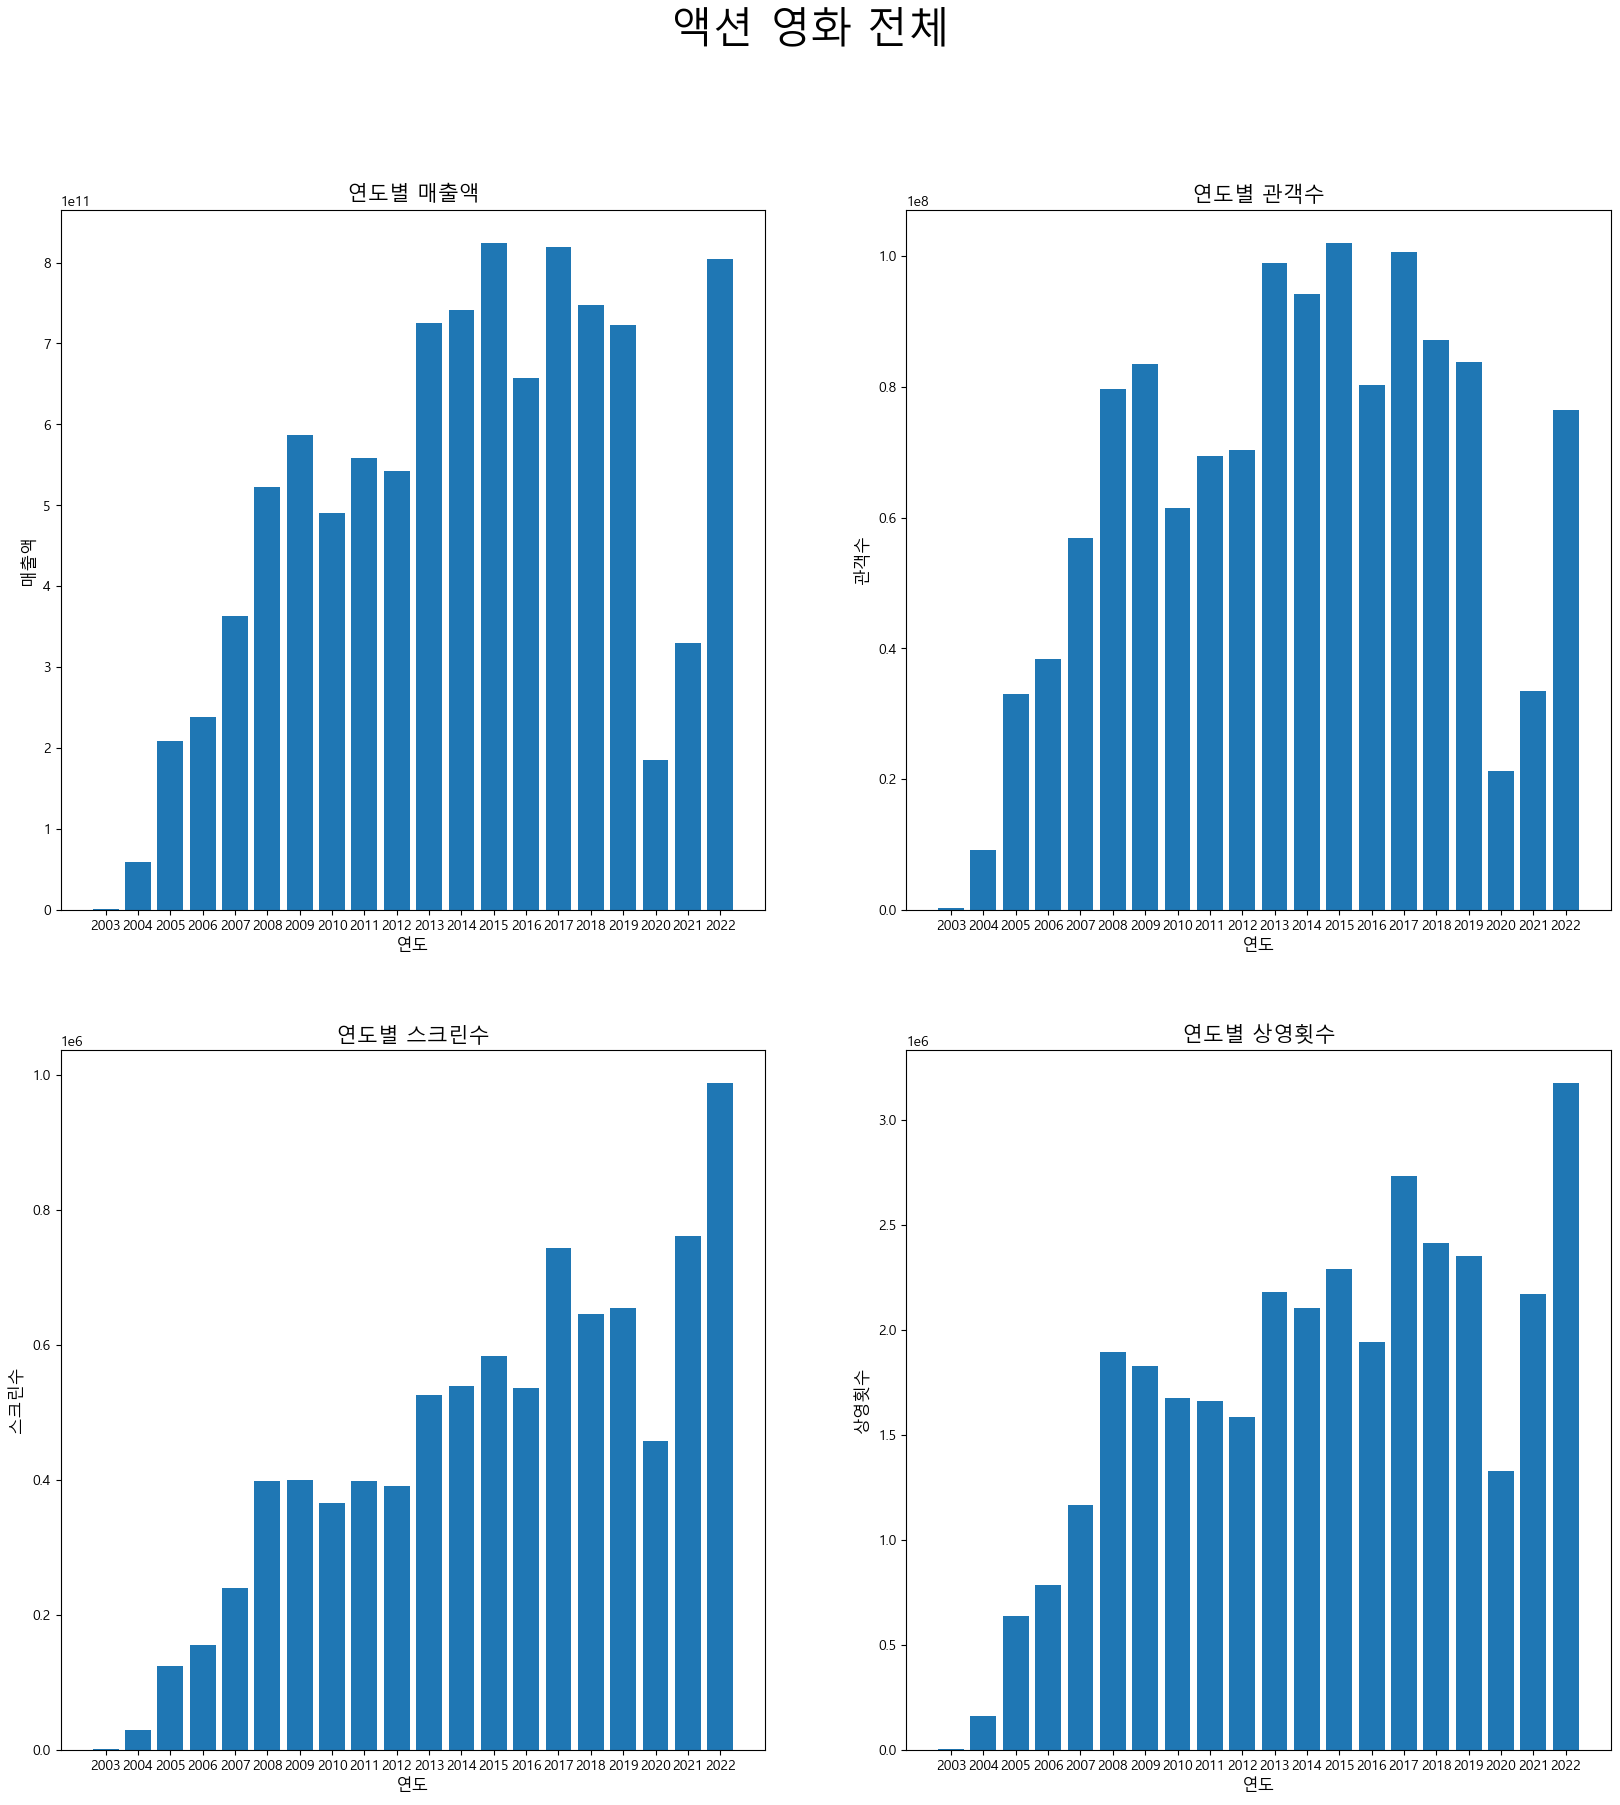

In [231]:
fig = plt.figure(figsize=(20,20))

year_list = list(map(lambda x : str(x),genre_movie_year_info['매출액'].index.to_list()))

ax1 = fig.add_subplot(2,2,1)
ax1.bar(year_list, genre_movie_year_info['매출액'].values)

ax1.set_title('연도별 매출액', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2 = fig.add_subplot(2,2,2)
ax2.bar(year_list, genre_movie_year_info['관객수'].values)

ax2.set_title('연도별 관객수', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('관객수',size=12)

ax3 = fig.add_subplot(2,2,3)
ax3.bar(year_list, genre_movie_year_info['스크린수'].values)

ax3.set_title('연도별 스크린수', size=15)
ax3.set_xlabel('연도',size=12)
ax3.set_ylabel('스크린수',size=12)

ax4 = fig.add_subplot(2,2,4)
ax4.bar(year_list, genre_movie_year_info['상영횟수'].values)

ax4.set_title('연도별 상영횟수', size=15)
ax4.set_xlabel('연도',size=12)
ax4.set_ylabel('상영횟수',size=12)

plt.suptitle(f'{genre} 영화 전체', size=30)

plt.show()

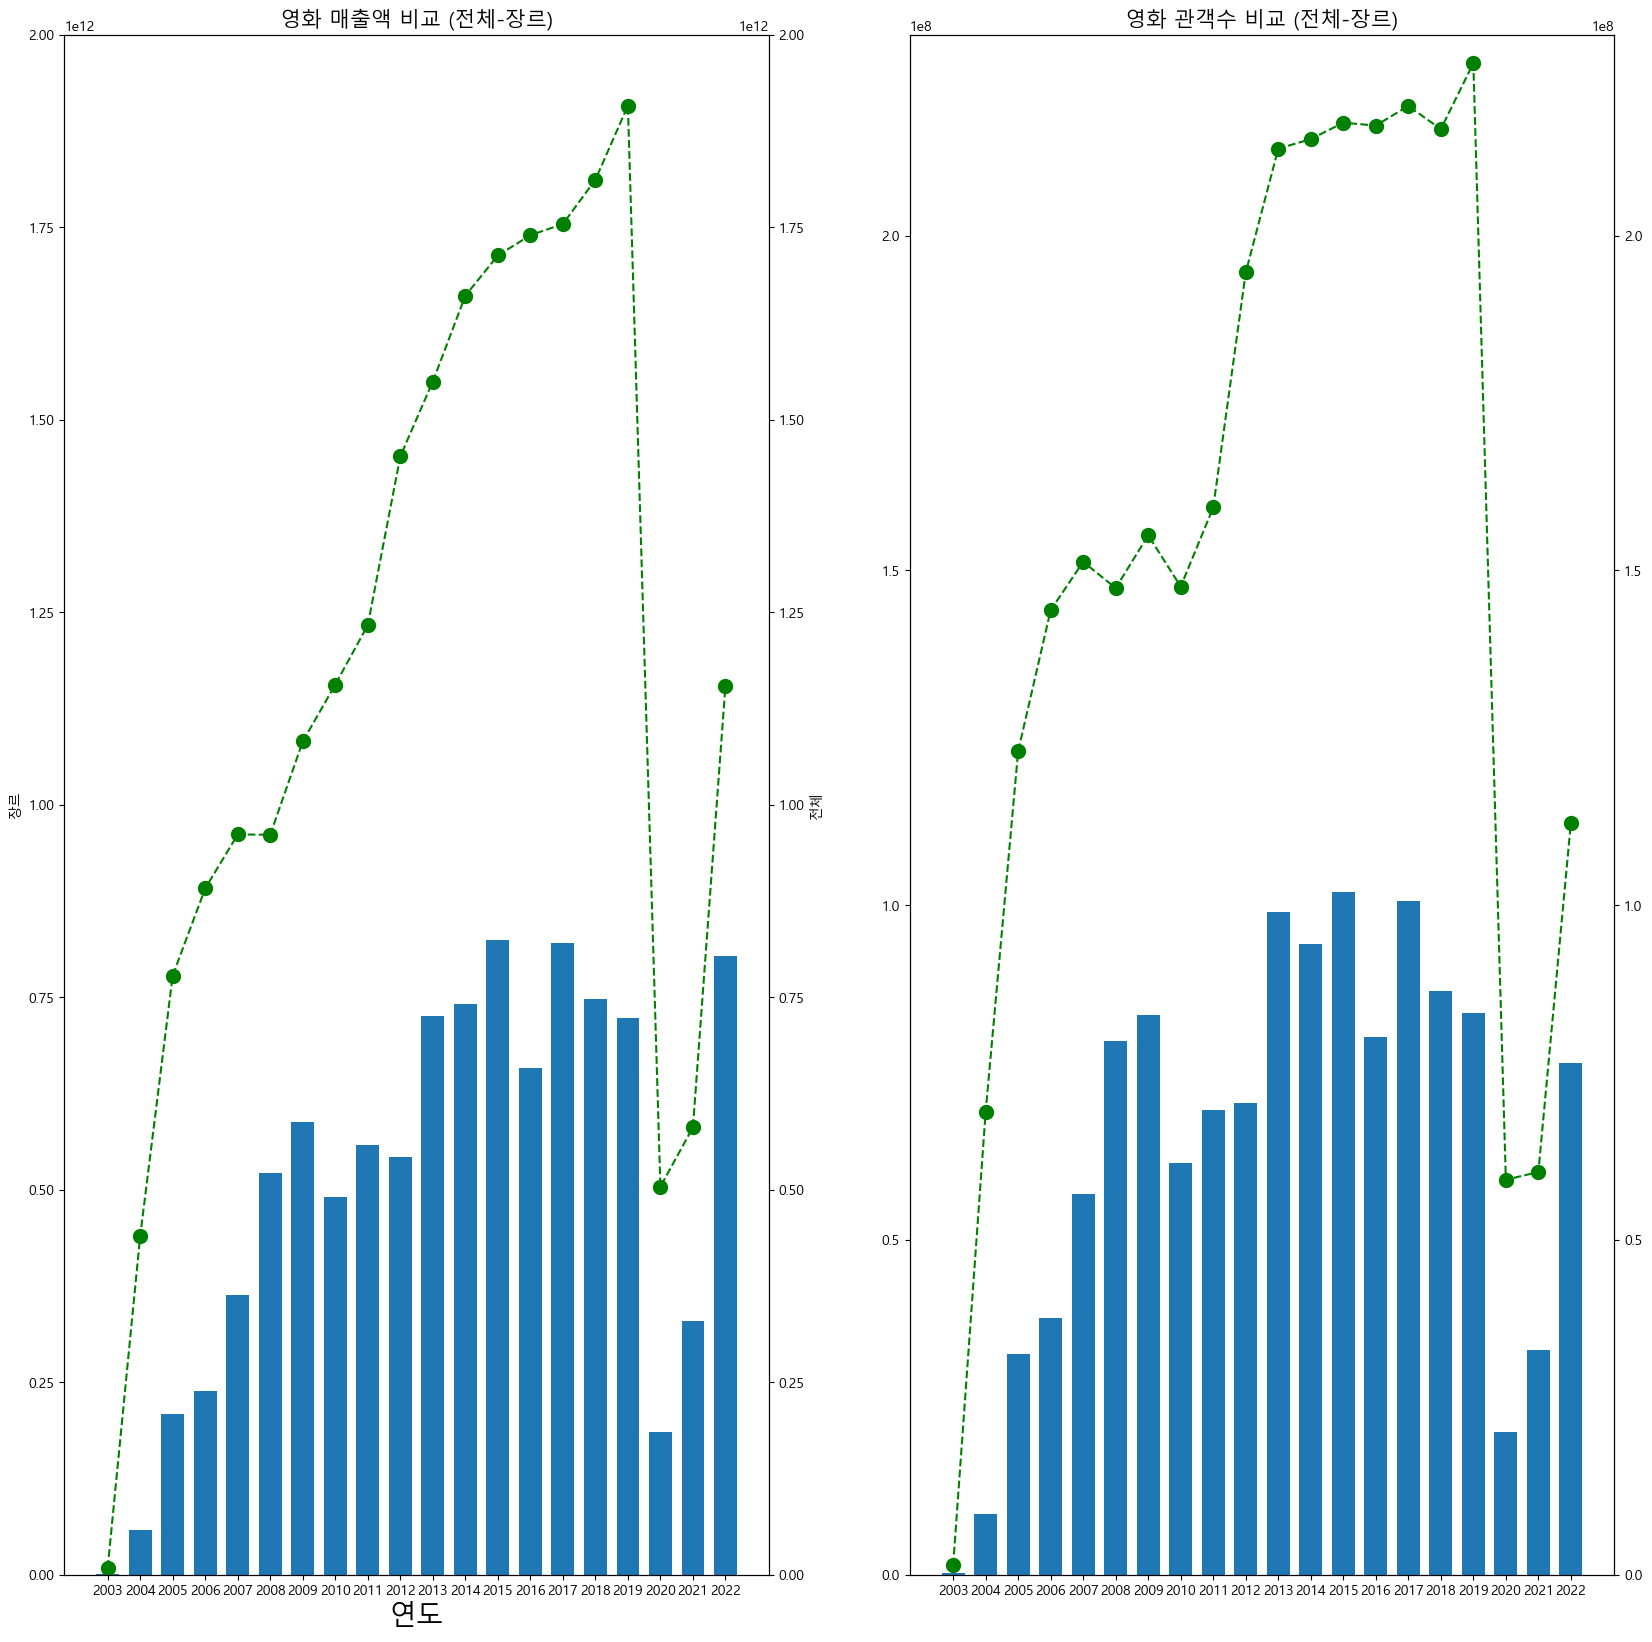

In [36]:
year_list = [str(i) for i in range(2003,2023)]

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,2,1)

ax1.bar(year_list, genre_movie_year_info['매출액'].values, width=0.7)
ax2 = ax1.twinx() # 여러 개의 그래프를 한 화면에 나타내기
ax2.plot(year_list, total_movie_year_info['매출액'].values, ls='--', marker='o', markersize=10,
         color='green', label='누적매출액') 

ax1.set_ylim(0, 2000000000000)
ax2.set_ylim(0, 2000000000000)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('장르')
ax2.set_ylabel('전체')

ax3 = fig.add_subplot(1,2,2)
ax3.bar(year_list, genre_movie_year_info['관객수'].values, width=0.7)
ax4 = ax3.twinx()
ax4.plot(year_list, total_movie_year_info['관객수'].values, ls='--', marker='o', markersize=10,
         color='green', label='누적매출액') 

ax3.set_ylim(0, 230000000)
ax4.set_ylim(0, 230000000)

ax1.set_title('영화 매출액 비교 (전체-장르)', size=15)
ax3.set_title('영화 관객수 비교 (전체-장르)', size=15)
plt.show()

In [171]:
genre_rate1 = pd.merge(genre_movie_year_info['매출액'], total_movie_year_info['매출액'],
                      left_on = "기준연도", right_on = '기준연도', how='left')
genre_rate1.columns = ['장르','전체']
genre_rate1['비율'] = round(genre_rate1['장르']/genre_rate1['전체']*100,1)
genre_rate1

genre_rate2 = pd.merge(genre_movie_year_info['관객수'], total_movie_year_info['관객수'],
                      left_on = "기준연도", right_on = '기준연도', how='left')
genre_rate2.columns = ['장르','전체']
genre_rate2['비율'] = round(genre_rate2['장르']/genre_rate2['전체']*100,1)
genre_rate2

,장르,전체,비율
기준연도,,,
2003,199370,1387201,14.4
2004,9096149,69114163,13.2
2005,32933652,123004102,26.8
2006,38311238,144063421,26.6
2007,56802442,151279529,37.5
2008,79718253,147355367,54.1
2009,83569303,155235763,53.8
2010,61503400,147580941,41.7
2011,69460081,159399837,43.6


In [173]:
print("-------매출액--------")
print('장르 합 : ',genre_rate1.sum().장르)
print('전체 합 : ',genre_rate1.sum().전체)
print('평균비율 : ',round(genre_rate1.sum().장르/genre_rate1.sum().전체*100,1))

print("-------관객수--------")
print('장르 합 : ',genre_rate2.sum().장르)
print('전체 합 : ',genre_rate2.sum().전체)
print('평균비율 : ',round(genre_rate2.sum().장르/genre_rate2.sum().전체*100,1))

-------매출액--------
장르 합 :  10127552043026.0
전체 합 :  23340407994802.0
평균비율 :  43.4
-------관객수--------
장르 합 :  1280353046.0
전체 합 :  3046031360.0
평균비율 :  42.0


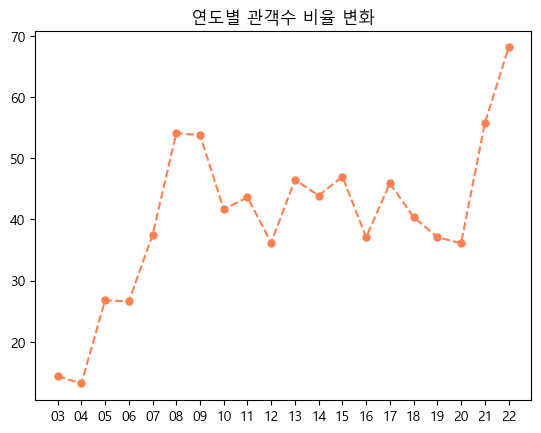

In [212]:
figsize=(20,5)
year_list = [str(i)[2:] for i in range(2003,2023)]
plt.plot(year_list, genre_rate2['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title("연도별 관객수 비율 변화")
plt.show()

# 연도별로 월별 관객수 비교 분석

In [84]:
movie_year_month_info = movie_genre.groupby(['기준연도','기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_year_month_info

매출액       관객수    스크린수    상영횟수
기준연도 기준월                                        
2003 11      740772500    110112     271    1508
     12      580587000     89258     341    1881
2004 1      5689197500    897139    1318    7447
     2      1326366000    205798     990    4678
     3       410732500     63963     395    2038
...                ...       ...     ...     ...
2022 8    105343078357  10275928  108218  356329
     9     75244055995   7267766   90647  315788
     10    22469187129   2170081   56715  162284
     11    34347331862   3329900   76000  215886
     12    92508457472   7541045   57377  173497

[230 rows x 4 columns]

In [85]:
movie_month_info = movie_genre[movie_genre["기준연도"]!=2003].groupby(['기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_month_info

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,594694836922,75956932,581281,2017447
2,546362126142,69716407,533532,1934364
3,466549645887,59465443,615142,2221472
4,626466427213,78480985,677080,2553418
5,1161348764360,144296303,851502,3528706
6,1021313584222,128583878,840977,3436312
7,1567016233028,200569394,1038624,4293911
8,1575117991765,202456194,1031592,4075127
9,753105626668,93721090,843345,3085143


In [42]:
movie_year_month_info.loc[2004]

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,5689197500,897139,1318,7447
2,1326366000,205798,990,4678
3,410732500,63963,395,2038
4,446821500,71266,335,1758
5,7201311800,1109547,3051,18028
6,1079313500,168121,1712,8314
7,1233844500,193326,292,1609
8,14692664000,2297036,4487,26094
9,12005762500,1863030,6268,33680


In [141]:
top_movie_year_month_info = top_genre.groupby(['기준연도','기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
top_movie_month_info = top_genre[top_genre["기준연도"]!=2003].groupby(['기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})

In [87]:
# 색상 맵 선택
cmap = cm.get_cmap('tab20c')
colors = cmap(np.array(range(1,50)))

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7896\1826526935.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


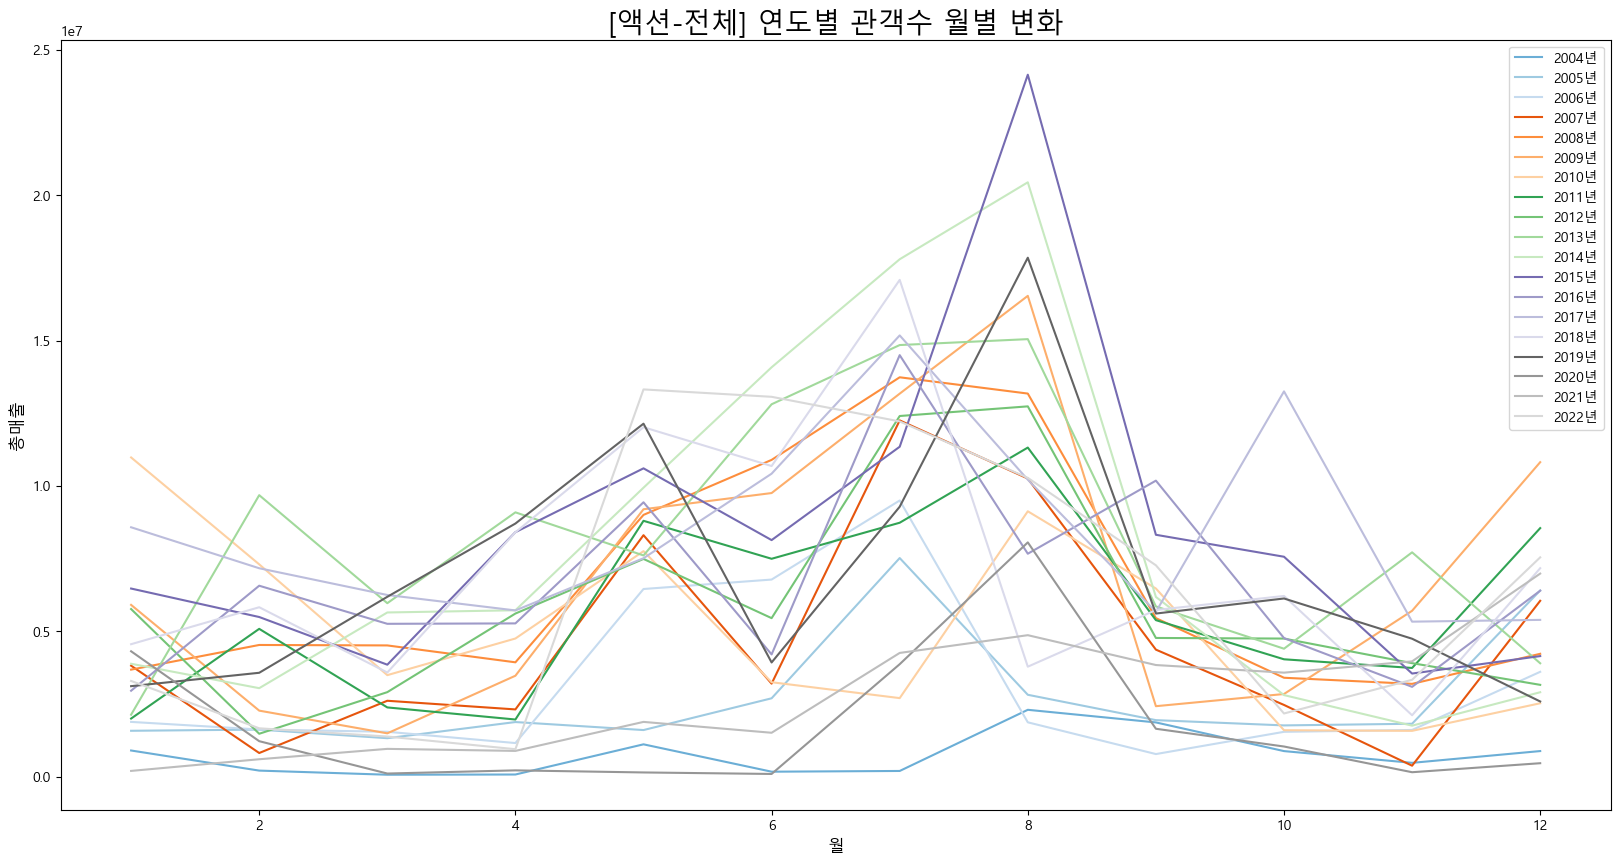

In [232]:
# 연도별 월별 관객수 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

year_list = range(2004,2023)

for i in range(len(year_list)):
    year = year_list[i]
    ax.plot(movie_year_month_info.loc[year]['관객수'].index,movie_year_month_info.loc[year]['관객수'], color=colors[i], label=f"{year}년")

ax.legend(loc="best")
ax.set_title(f'[{genre}-전체] 연도별 관객수 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

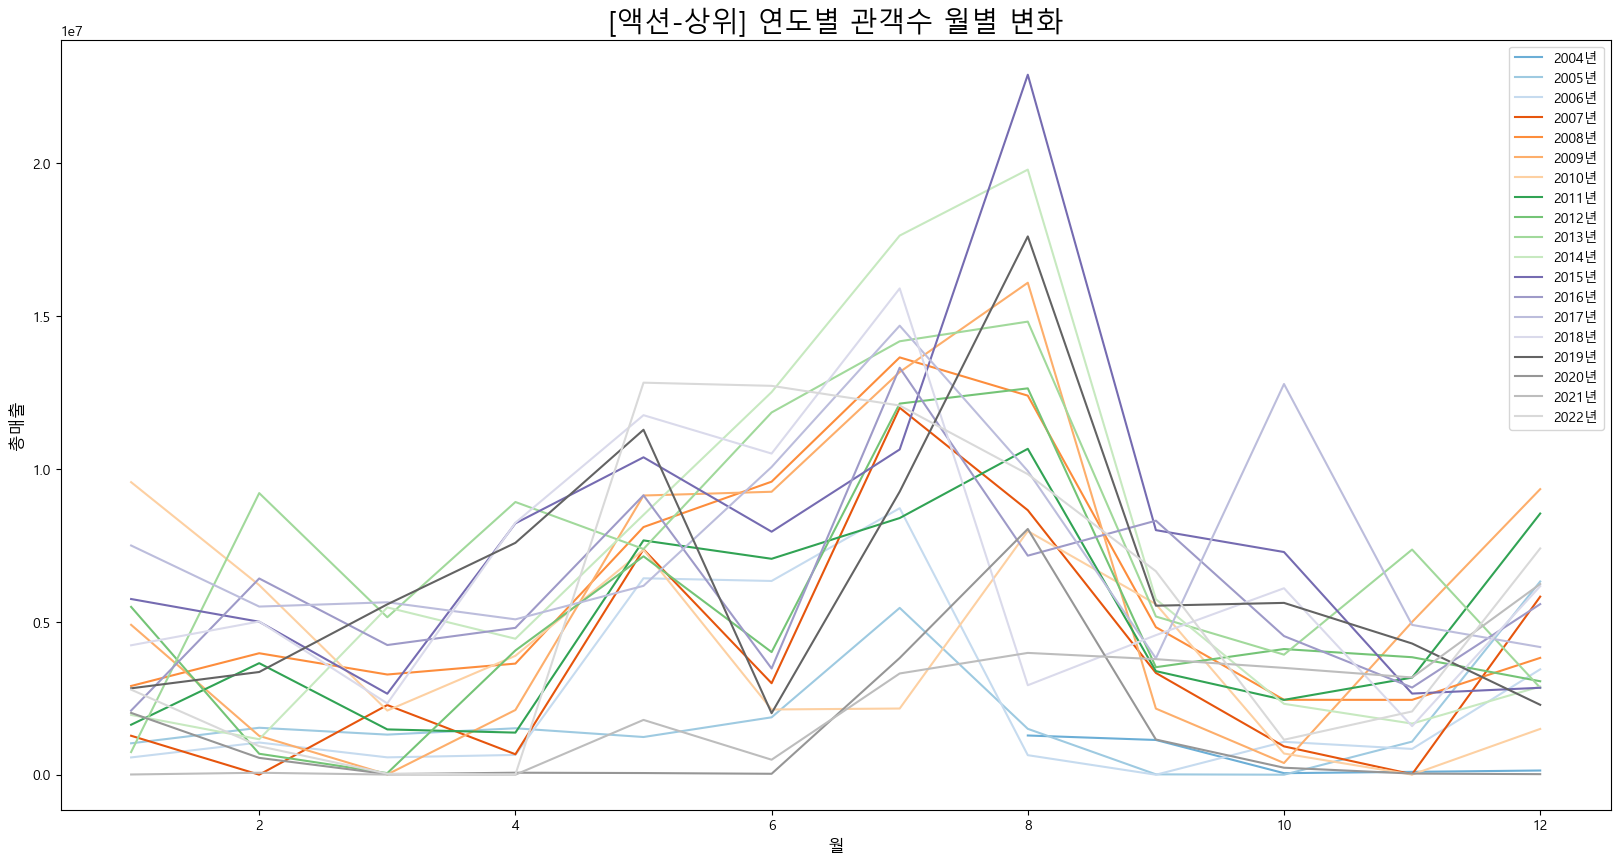

In [135]:
# 연도별 월별 관객수 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

year_list = range(2004,2023)

for i in range(len(year_list)):
    try: 
        year = year_list[i]
        ax.plot(top_movie_year_month_info.loc[year]['관객수'].index,top_movie_year_month_info.loc[year]['관객수'], color=colors[i], label=f"{year}년")
    except:
        pass
    
ax.legend(loc="best")
ax.set_title(f'[{genre}-상위] 연도별 관객수 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

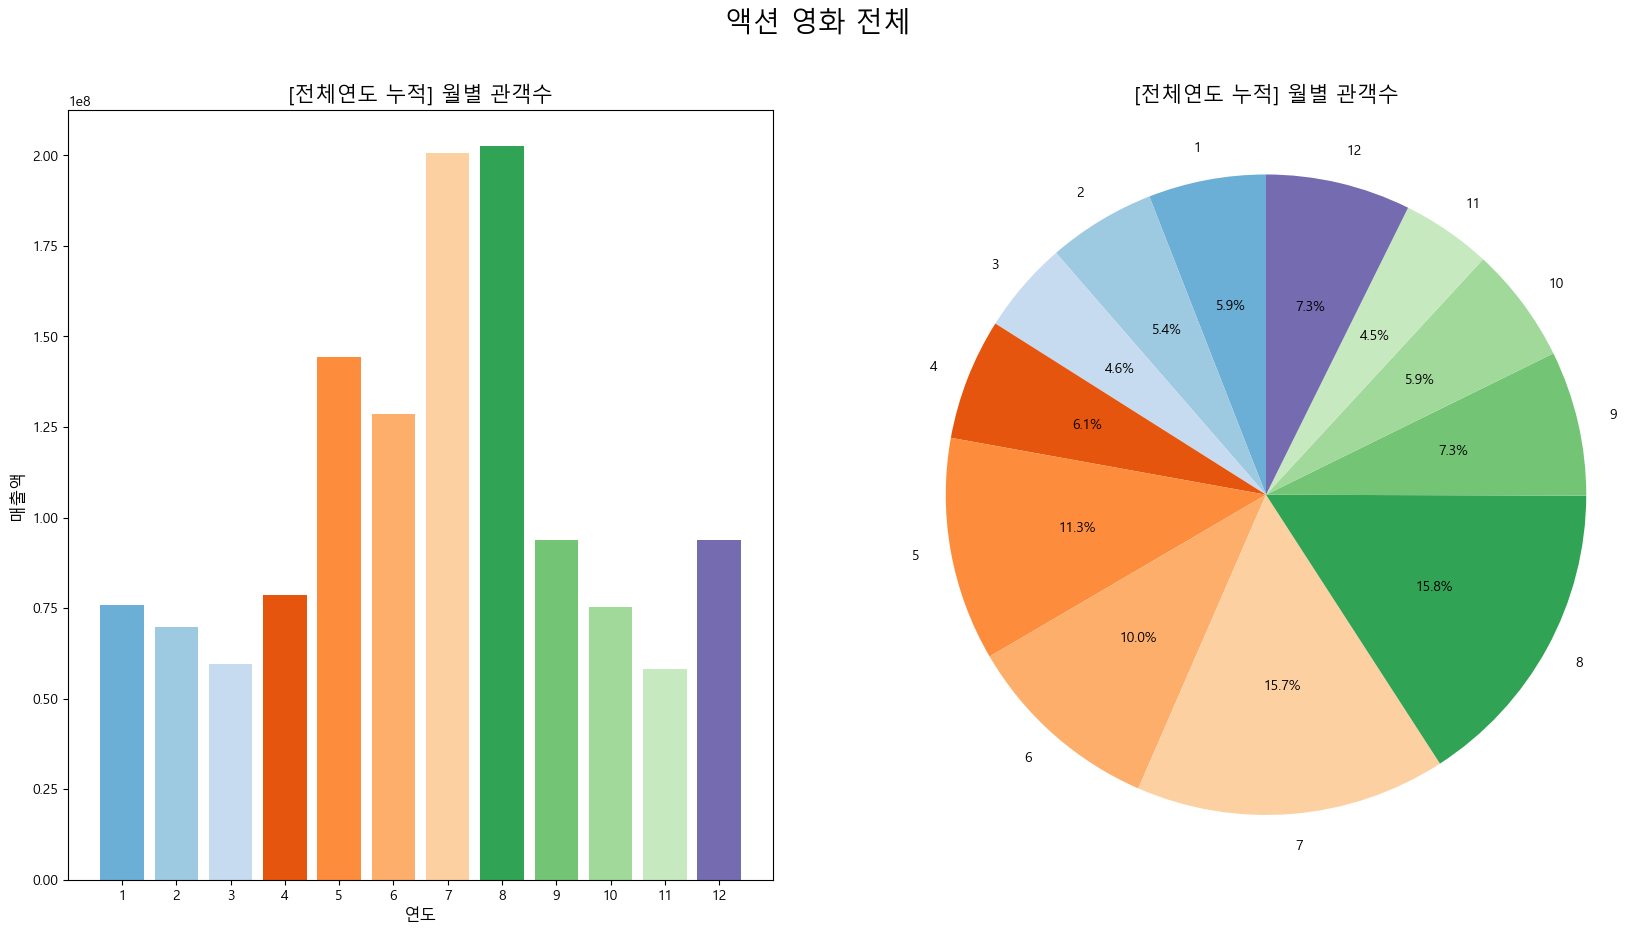

In [233]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, movie_month_info['관객수'].values, color=colors)

ax1.set_title('[전체연도 누적] 월별 관객수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2.pie(movie_month_info['관객수'].values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[전체연도 누적] 월별 관객수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

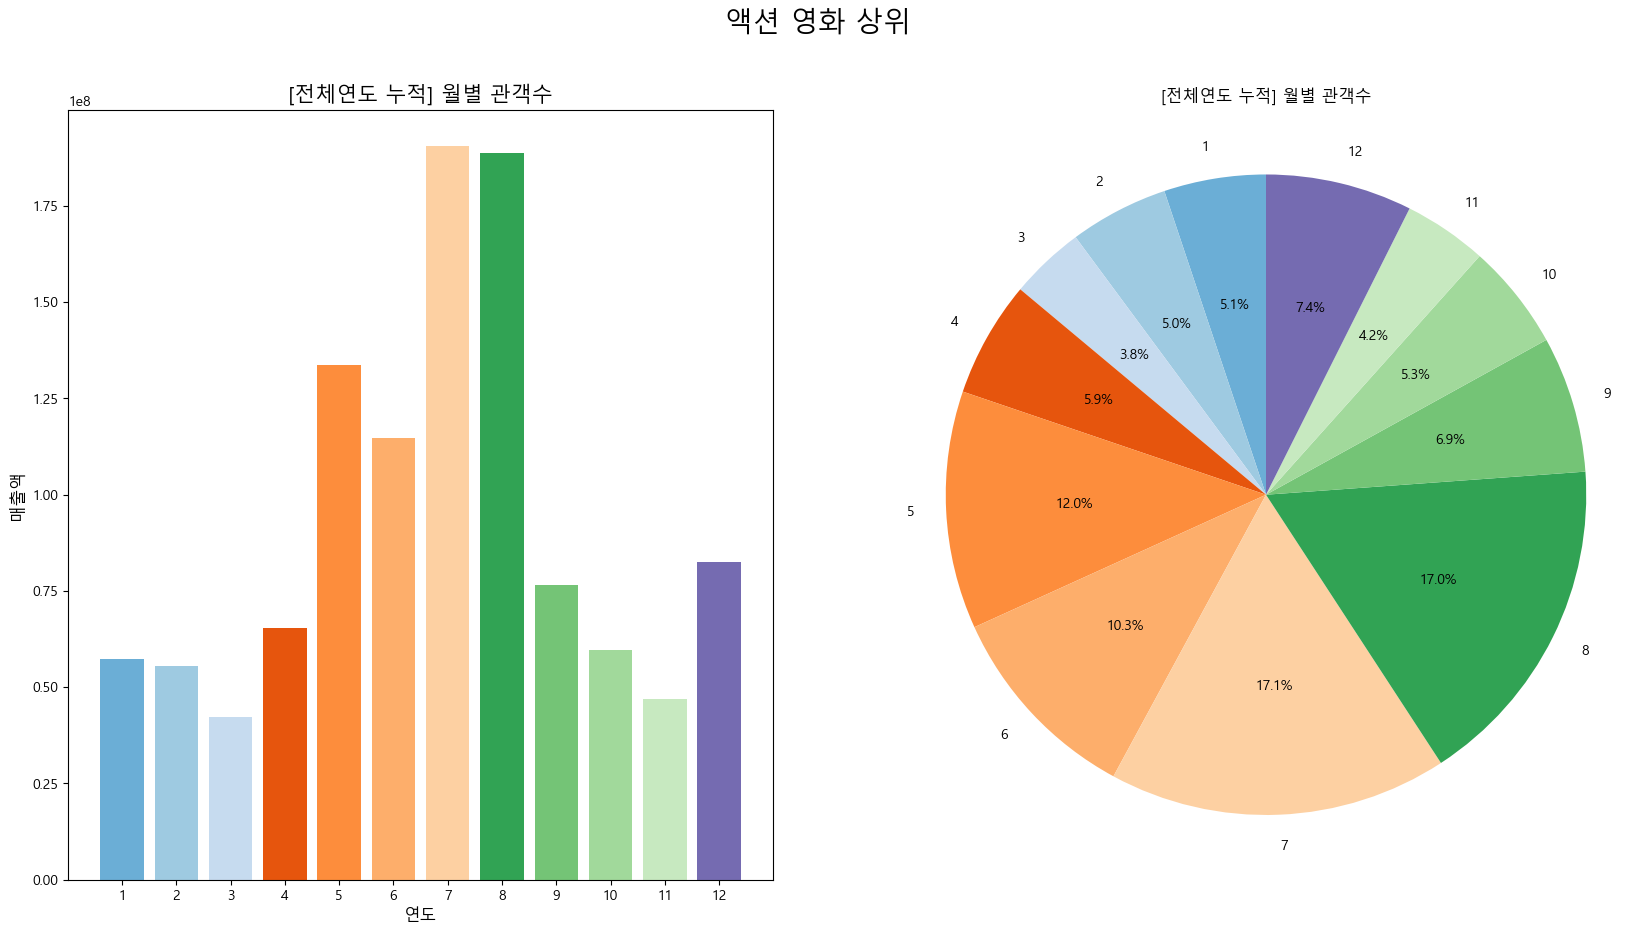

In [139]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(month_list, top_movie_month_info['관객수'].values, color=colors)

ax1.set_title('[전체연도 누적] 월별 관객수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2.pie(top_movie_month_info['관객수'].values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[전체연도 누적] 월별 관객수')
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

# 연도별 개봉한 영화수

In [142]:
open_count = movie_genre[['영화명','개봉일','개봉연도','개봉월']].copy()
open_count.drop_duplicates(inplace=True)

print(len(open_count))

3029


In [91]:
open_count_df1 = open_count[open_count["개봉연도"]>2003].groupby(['개봉연도'])['영화명'].count()
open_count_df1

개봉연도
2004     33
2005     54
2006     52
2007     60
2008     76
2009     65
2010     64
2011    103
2012     99
2013    208
2014    245
2015    218
2016    219
2017    279
2018    235
2019    187
2020    151
2021    172
2022    168
Name: 영화명, dtype: int64

In [92]:
open_count_df2 = open_count[open_count["개봉연도"]>2003].groupby(['개봉월'])['영화명'].count()
open_count_df2

개봉월
1     205
2     207
3     201
4     218
5     206
6     237
7     249
8     234
9     243
10    202
11    252
12    234
Name: 영화명, dtype: int64

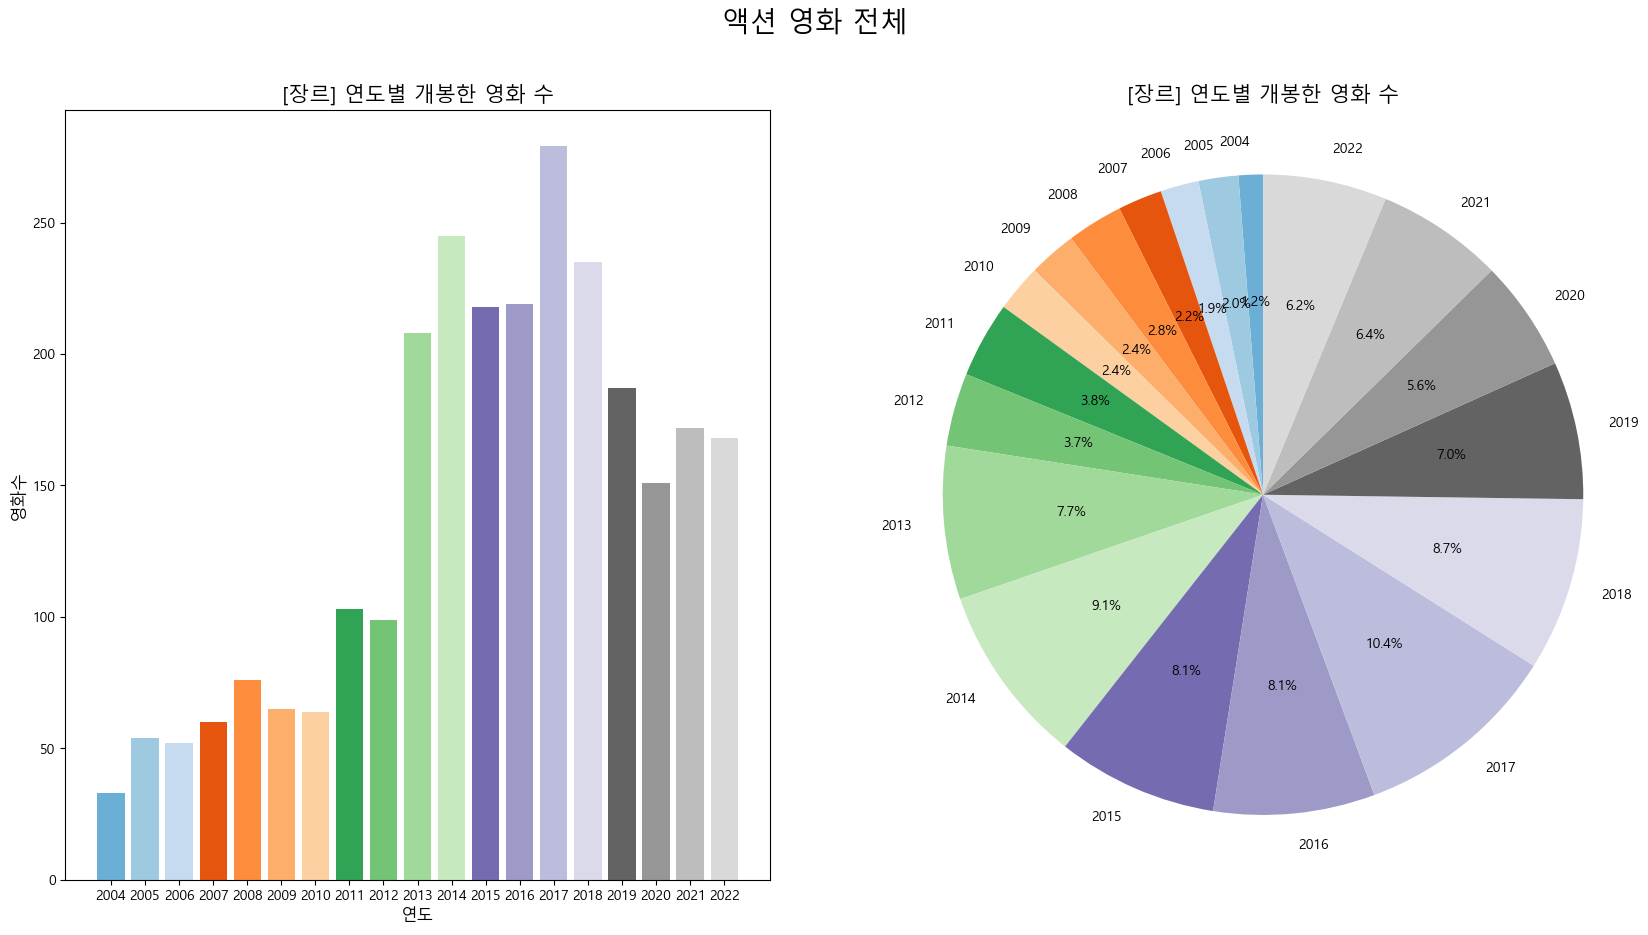

In [143]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in range(2004,2023)]
month_list = [str(i) for i in range(1,13)]

ax1.bar(year_list, open_count_df1.values, color=colors)

ax1.set_title('[장르] 연도별 개봉한 영화 수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(open_count_df1.values.flatten(), labels=year_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[장르] 연도별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

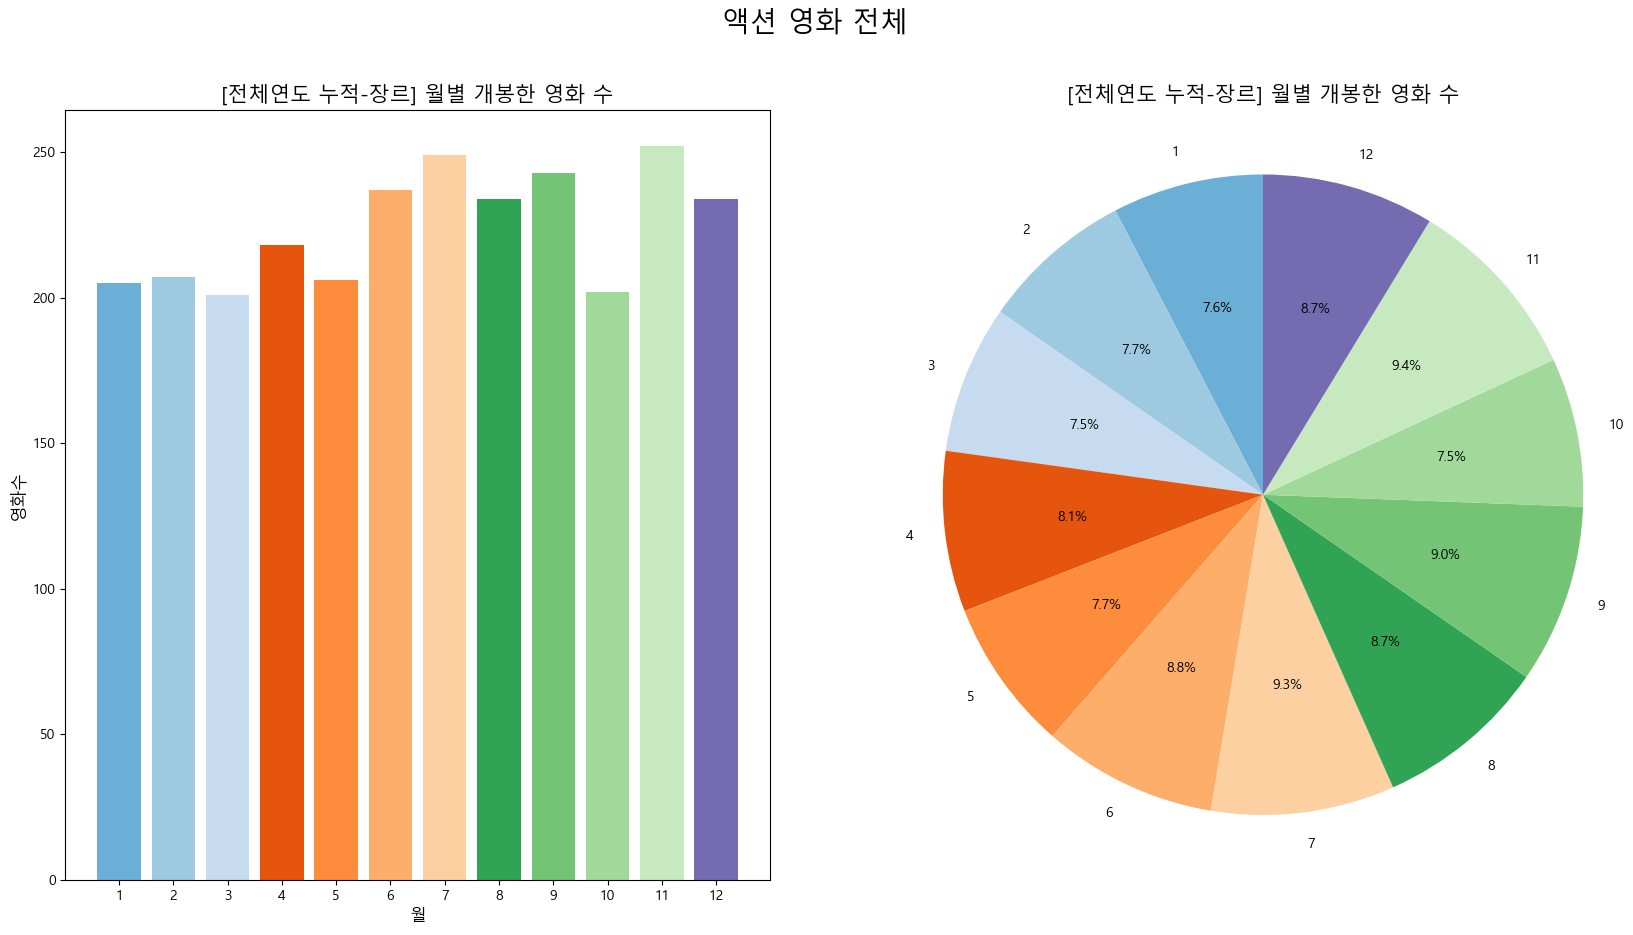

In [144]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in range(2003,2023)]
month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, open_count_df2.values, color=colors)

ax1.set_title('[전체연도 누적-장르] 월별 개봉한 영화 수', size=15)
ax1.set_xlabel('월',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(open_count_df2.values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[전체연도 누적-장르] 월별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

In [145]:
top_open_count = top_genre[['영화명','개봉일','개봉연도','개봉월']].copy()
top_open_count.drop_duplicates(inplace=True)

print(len(top_open_count))

329


In [146]:
top_open_count_df1 = top_open_count[top_open_count["개봉연도"]>2003].groupby(['개봉연도'])['영화명'].count()
top_open_count_df1

개봉연도
2004     3
2005    10
2006    15
2007    12
2008    26
2009    21
2010    15
2011    19
2012    18
2013    29
2014    24
2015    21
2016    19
2017    25
2018    23
2019    19
2020     6
2021    11
2022    13
Name: 영화명, dtype: int64

In [147]:
top_open_count_df2 = top_open_count[top_open_count["개봉연도"]>2003].groupby(['개봉월'])['영화명'].count()
top_open_count_df2

개봉월
1     19
2     15
3     15
4     31
5     35
6     34
7     52
8     30
9     25
10    21
11    20
12    32
Name: 영화명, dtype: int64

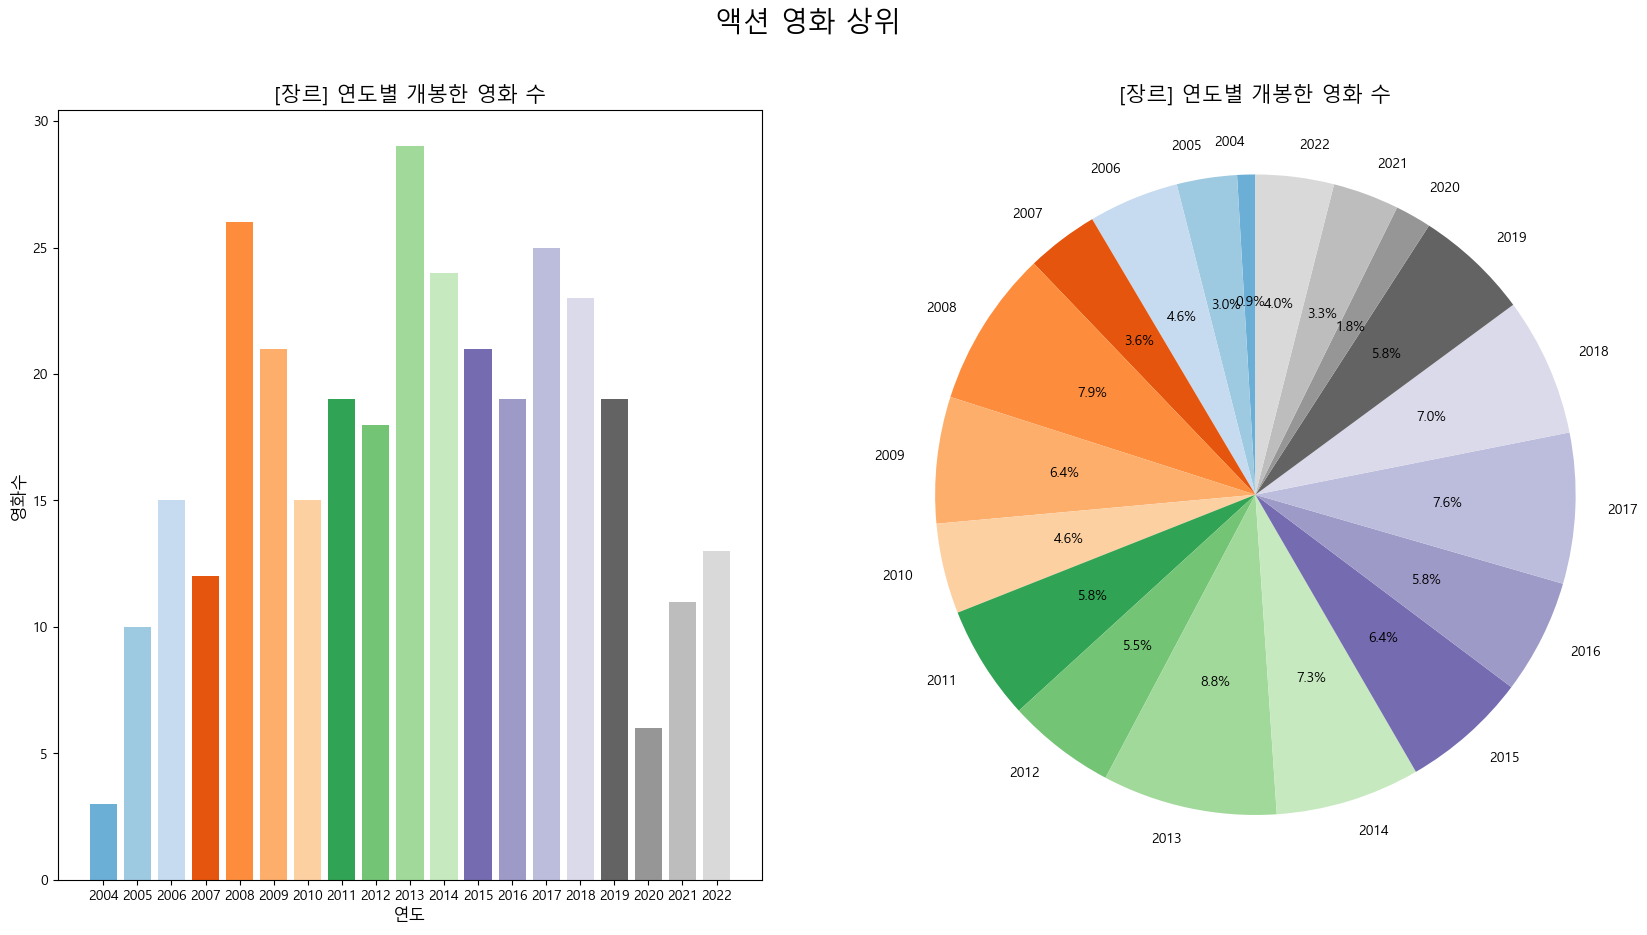

In [150]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in range(2004,2023)]
month_list = [str(i) for i in range(1,13)]

ax1.bar(year_list, top_open_count_df1.values, color=colors)

ax1.set_title('[장르] 연도별 개봉한 영화 수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(top_open_count_df1.values.flatten(), labels=year_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[장르] 연도별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

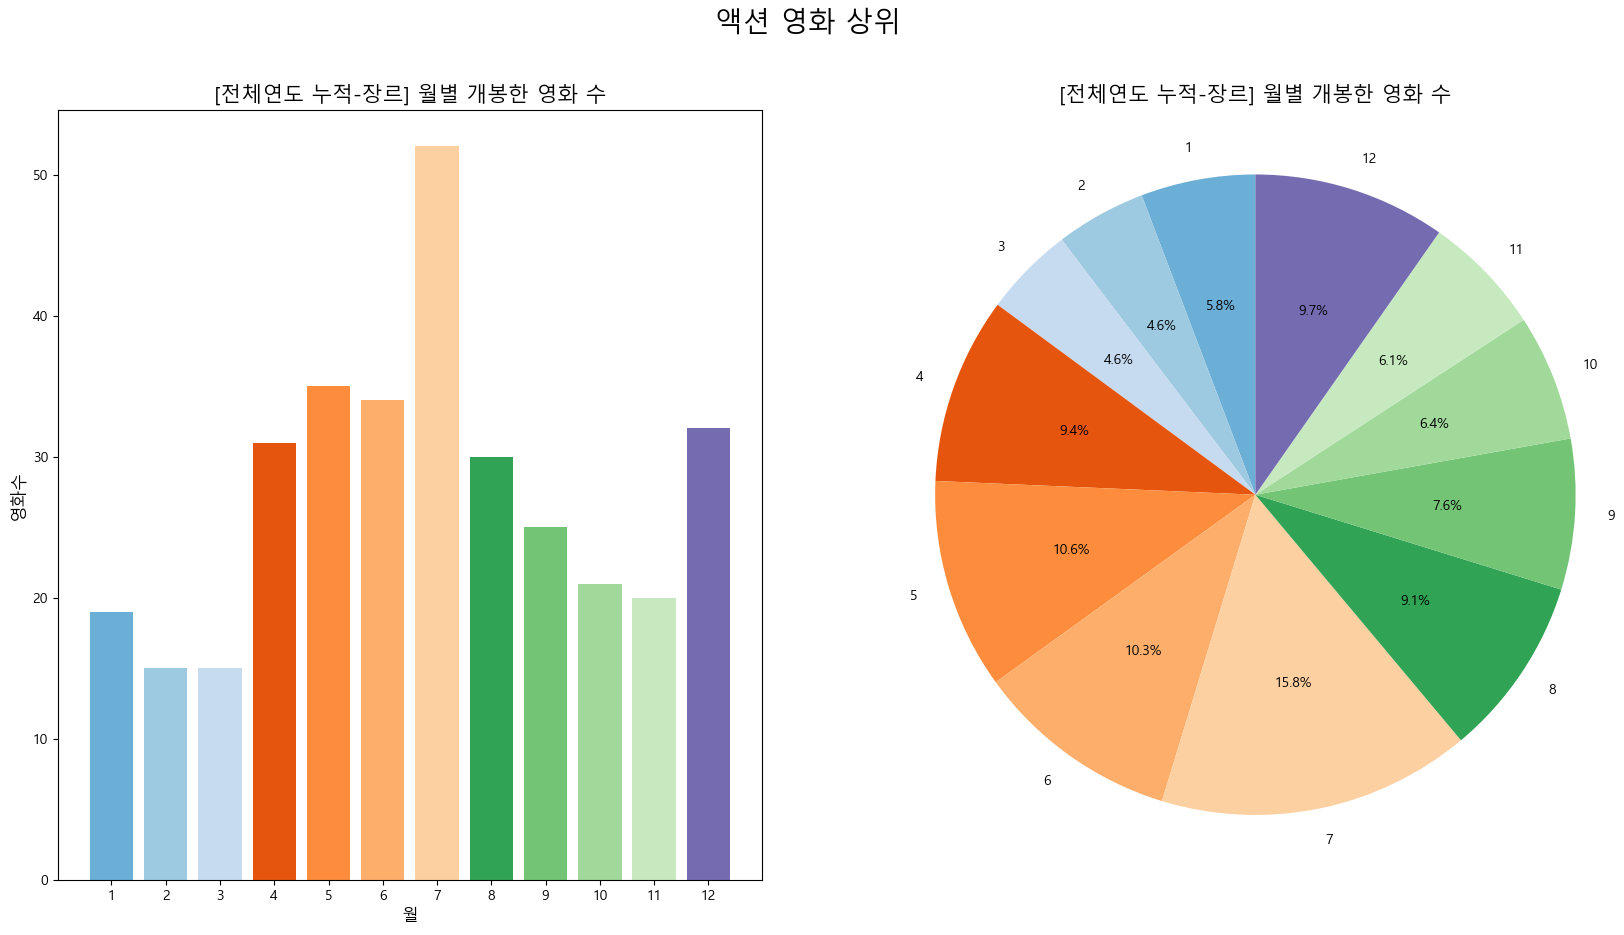

In [151]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in range(2003,2023)]
month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, top_open_count_df2.values, color=colors)

ax1.set_title('[전체연도 누적-장르] 월별 개봉한 영화 수', size=15)
ax1.set_xlabel('월',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(top_open_count_df2.values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title('[전체연도 누적-장르] 월별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

In [192]:
top_open_count_df1
top_open_count_df2

개봉월
1     19
2     15
3     15
4     31
5     35
6     34
7     52
8     30
9     25
10    21
11    20
12    32
Name: 영화명, dtype: int64

In [195]:
top_open_count_df1

개봉연도
2004     3
2005    10
2006    15
2007    12
2008    26
2009    21
2010    15
2011    19
2012    18
2013    29
2014    24
2015    21
2016    19
2017    25
2018    23
2019    19
2020     6
2021    11
2022    13
Name: 영화명, dtype: int64

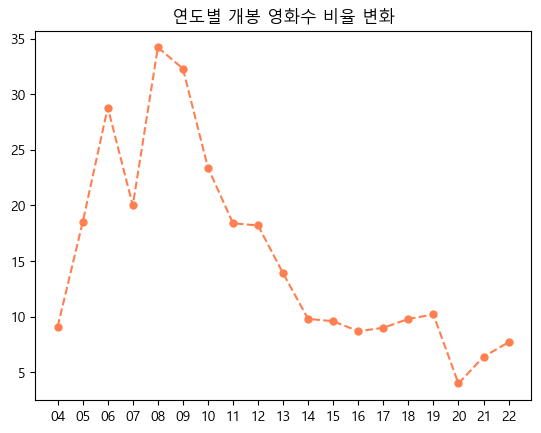

In [218]:
open_count_rate1 = pd.merge(open_count_df1, top_open_count_df1,
                            left_on = '개봉연도', right_on = '개봉연도', how = 'left')

open_count_rate1.columns = ['전체','장르']
open_count_rate1['비율'] = round(open_count_rate1['장르']/open_count_rate1['전체']*100,1)

figsize=(20,5)
year_list = [str(i)[2:] for i in range(2004,2023)]
plt.plot(year_list, open_count_rate1['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title("연도별 개봉 영화수 비율 변화")
plt.show()

In [203]:
open_count_rate1.sort_values(['비율'],ascending=False)[:10]

,전체,장르,비율
개봉연도,,,
2008,76,26,34.2
2009,65,21,32.3
2006,52,15,28.8
2010,64,15,23.4
2007,60,12,20.0
2005,54,10,18.5
2011,103,19,18.4
2012,99,18,18.2
2013,208,29,13.9


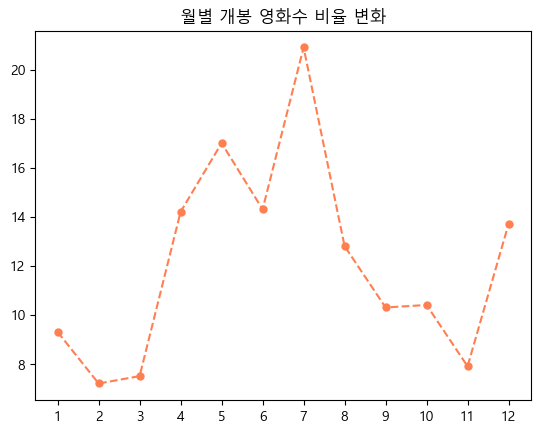

In [220]:
open_count_rate2 = pd.merge(open_count_df2, top_open_count_df2,
                            left_on = '개봉월', right_on = '개봉월', how = 'left')

open_count_rate2.columns = ['전체','장르']
open_count_rate2['비율'] = round(open_count_rate2['장르']/open_count_rate2['전체']*100,1)

figsize=(20,5)
month_list = [str(i) for i in range(1,13)]
plt.plot(month_list, open_count_rate2['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title("월별 개봉 영화수 비율 변화")
plt.show()

In [229]:
open_count_rate2.sort_values(['비율'],ascending=False)['비율'].agg(['min', 'max', 'mean'])

min      7.200
max     20.900
mean    12.125
Name: 비율, dtype: float64

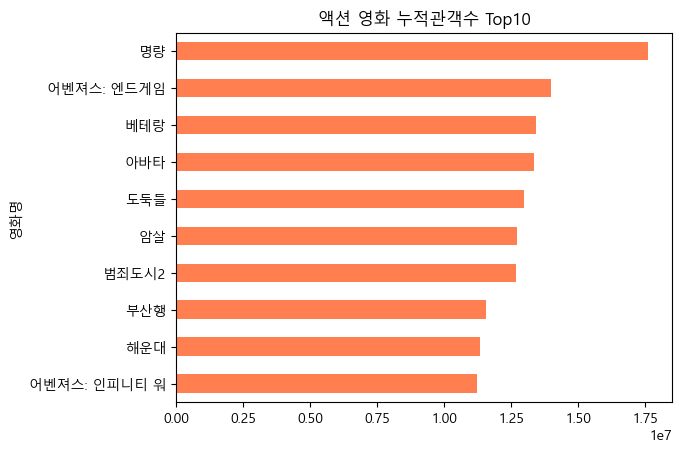

In [252]:
movie_genre.groupby(["영화명","개봉일"])['누적관객수'].max().to_frame().sort_values(['누적관객수'],ascending=False)[:10].sort_values(['누적관객수'])[:10].reset_index().set_index('영화명')["누적관객수"].plot(kind='barh', color='coral')
plt.title(f'{genre} 영화 누적관객수 Top10')
plt.show()

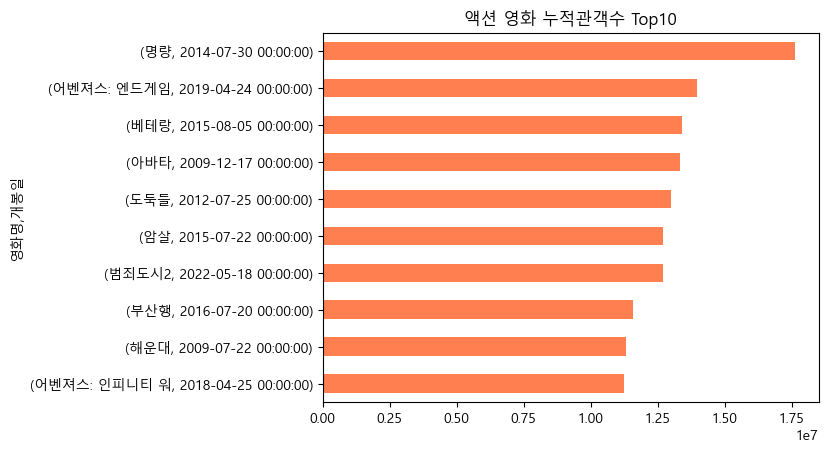

In [255]:
movie_genre.groupby(["영화명","개봉일"])['누적관객수'].max().to_frame().sort_values(['누적관객수'],ascending=False)[:10]["누적관객수"].sort_values().plot(kind='barh', color='coral')
plt.title(f'{genre} 영화 누적관객수 Top10')
plt.show()